# HST.508 HW2

# Code availability

The Jupyter Notebook `pset_2.ipynb` is available at [https://github.com/gohdavid/hst508](https://github.com/gohdavid/hst508).

# Problem 1

## Problem 1 a

In [2]:
from utils import plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

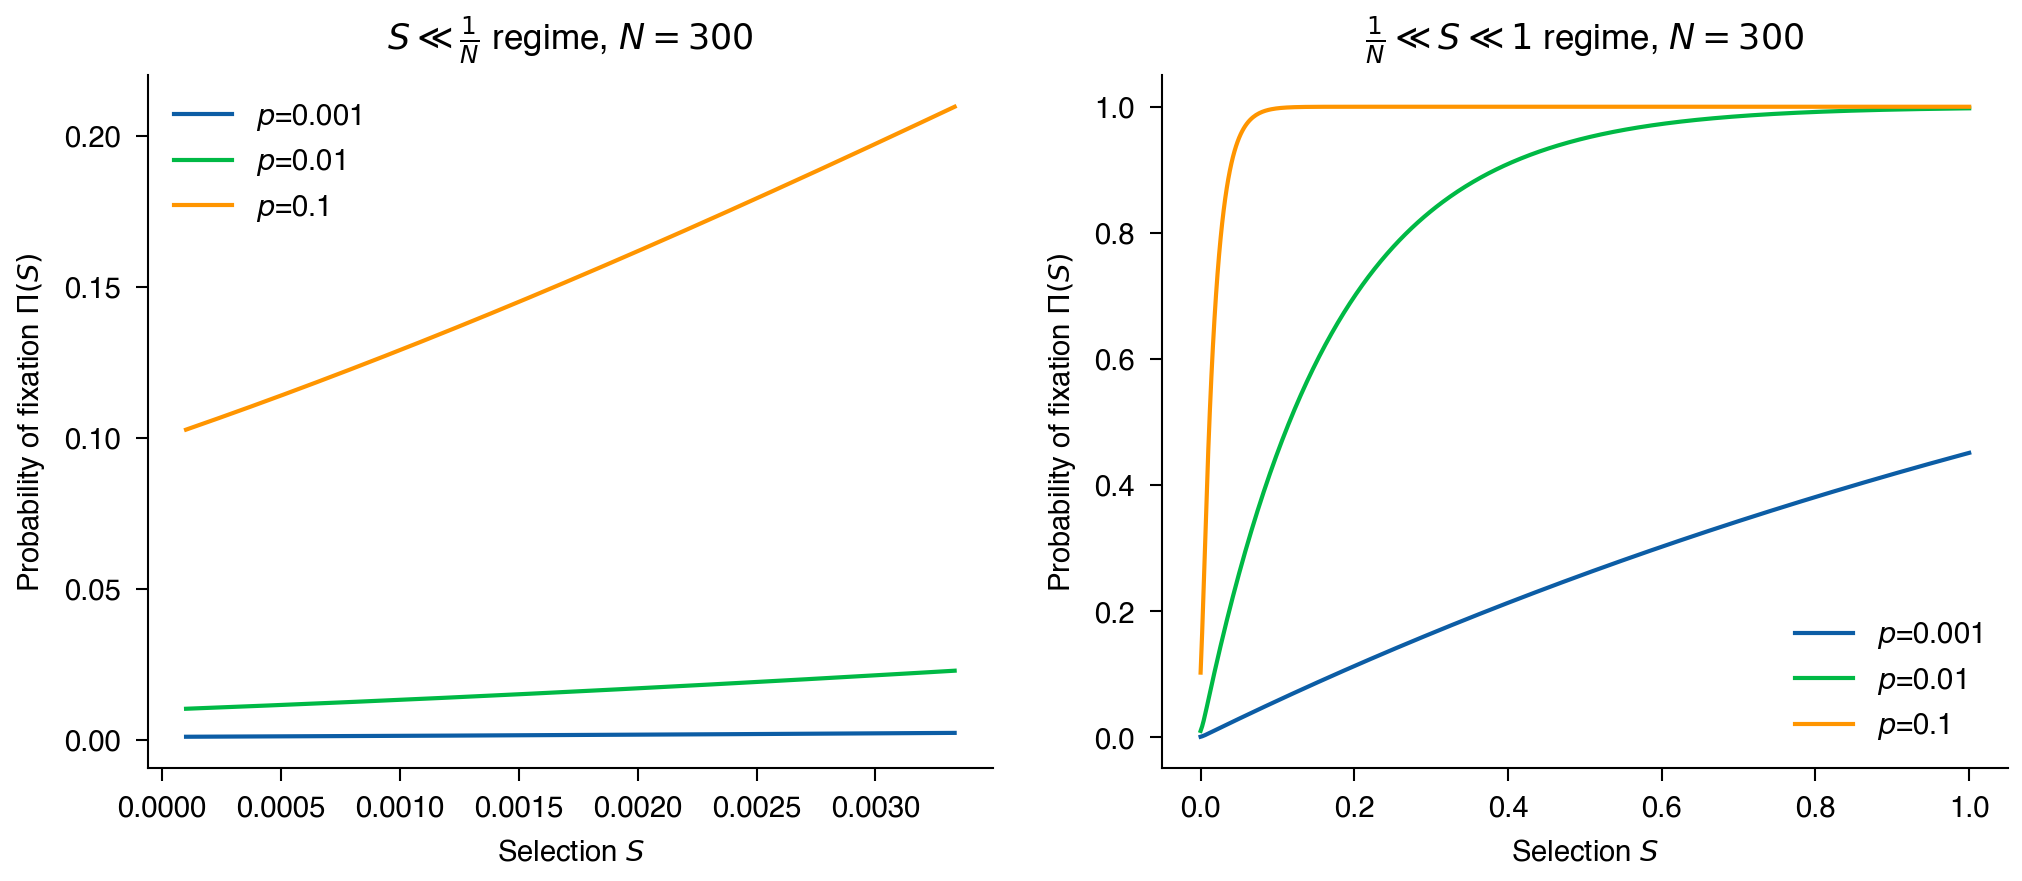

In [9]:
def probability_of_fixation(N,S,p):
    return (1-np.exp(-2*N*S*p))/(1-np.exp(-2*N*S))
N = 300
ps = [0.001,0.01,0.1]

fig, ax = plt.subplots(1,2)
fig.set_siz\sigma_inches(8,3)

Ss = np.linspace(start=1e-4, stop=1/N, num=500)
ax[0].set_ylabel("Probability of fixation $\Pi(S)$")
ax[0].set_xlabel("Selection $S$")
ax[0].set_title(r"$S \ll \frac{1}{N}$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,
                 y=probability_of_fixation(N,Ss,p),
                 ax=ax[0],
                 label=f"$p$={p:.2g}")

Ss = np.linspace(start=1e-4, stop=1, num=500)
ax[1].set_ylabel("Probability of fixation $\Pi(S)$")
ax[1].set_xlabel("Selection $S$")
ax[1].set_title(r"$\frac{1}{N} \ll S \ll 1$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,
                 y=probability_of_fixation(N,Ss,p),
                 ax=ax[1],
                 label=f"$p$={p:.2g}")

Probability of a beneficial fixation increases monotonically with selection. In both regimes of weak and strong selection, higher initial frequencies of the beneficial polymorphism are more sensitive to selection. For instance, the $p=0.1$ curve rises more steeply than the $p=0.01$ curve. For even lower initial frequencies e.g., $p=0.001$, 100\% fixation is not reached even for the strongest selection $S=1$.

## Problem 1 b

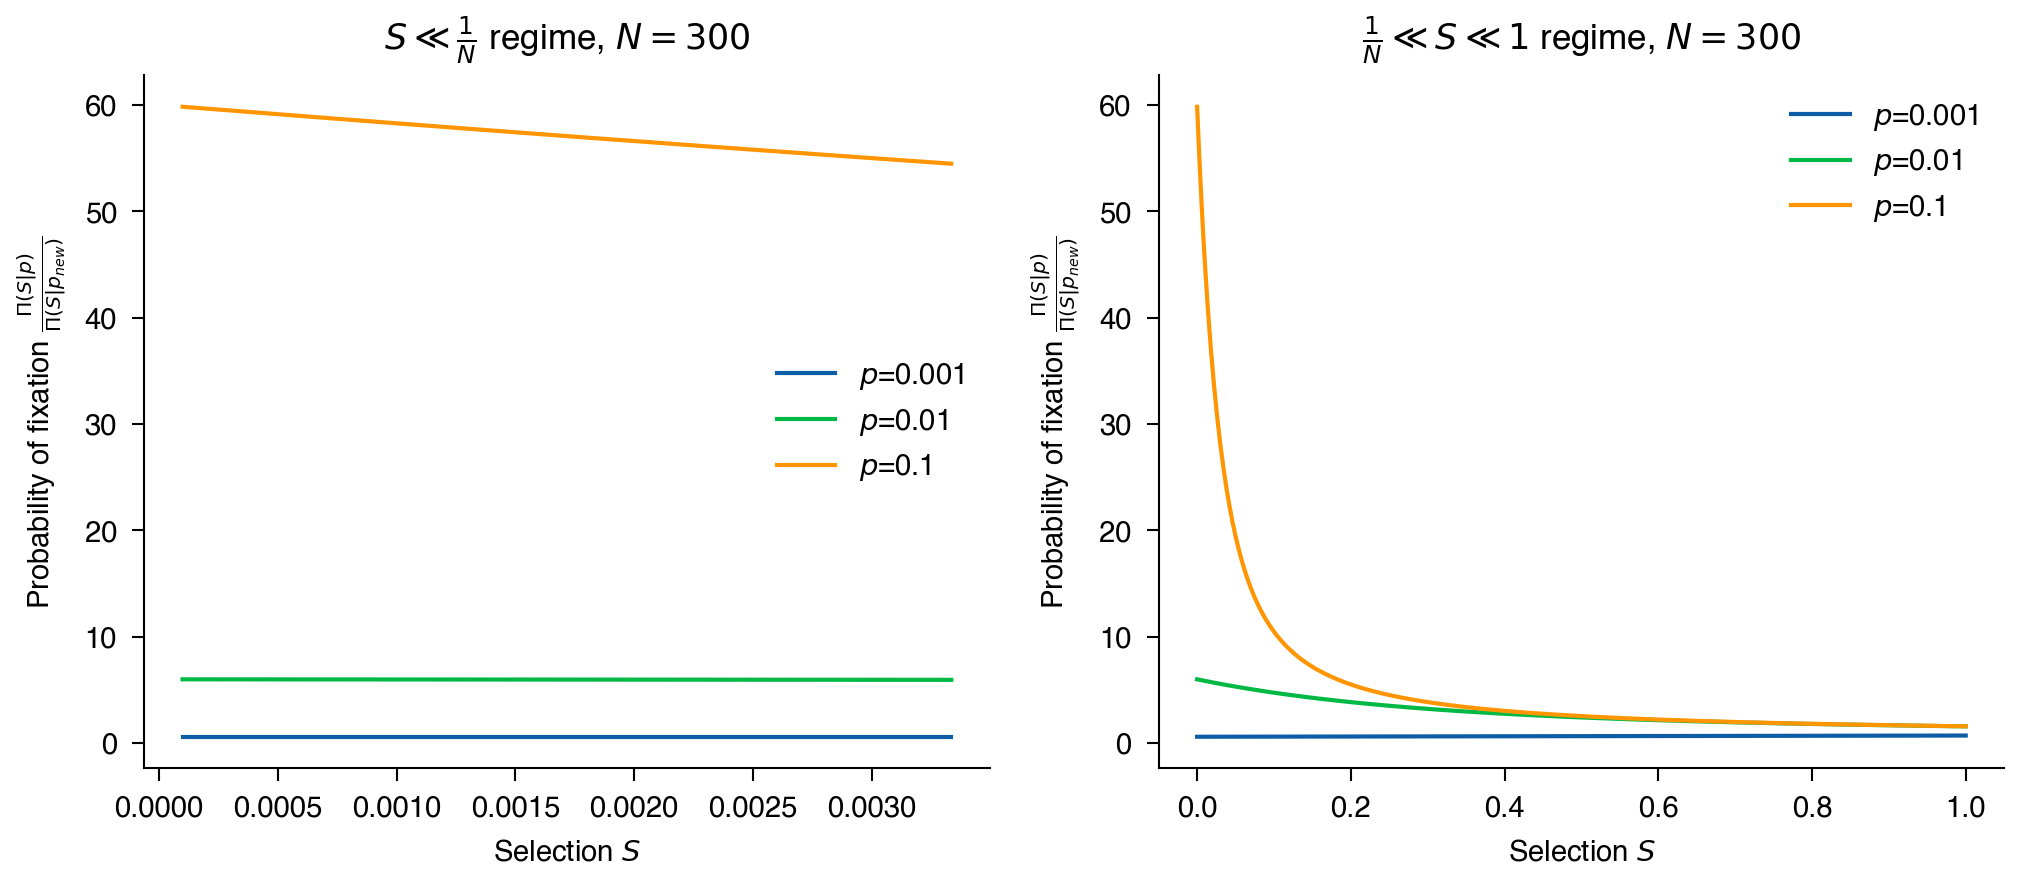

In [15]:
fig, ax = plt.subplots(1,2)
fig.set_siz\sigma_inches(8,3)

N = 300
p_new = 1/(2*N)
ps = [0.001,0.01,0.1,]

Ss = np.linspace(start=1e-4, stop=1/N, num=500)
ax[0].set_ylabel(r"Probability of fixation $\frac{\Pi(S|p)}{\Pi(S|p_{new})}$")
ax[0].set_xlabel("Selection $S$")
ax[0].set_title(r"$S \ll \frac{1}{N}$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,
                 y=probability_of_fixation(N,Ss,p)/probability_of_fixation(N,Ss,p_new),
                 ax=ax[0],
                 label=f"$p$={p:.2g}")

Ss = np.linspace(start=1e-4, stop=1, num=500)
ax[1].set_ylabel(r"Probability of fixation $\frac{\Pi(S|p)}{\Pi(S|p_{new})}$")
ax[1].set_xlabel("Selection $S$")
ax[1].set_title(r"$\frac{1}{N} \ll S \ll 1$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,
                 y=probability_of_fixation(N,Ss,p)/probability_of_fixation(N,Ss,p_new),
                 ax=ax[1],
                 label=f"$p$={p:.2g}")

The ratio of the probability of fixation due to migration and for a new mutation decreases monotonically as selection increases. In fact, the ratios converge at large $S$. This suggests that with stronger selection pressures, there is not as much of an advantage for higher migration initial frequencies against random mutations.

This is is because the probability of fixation saturates (figure omn the left below). A higher resolution inspection of the convergence shows that there is in fact a difference between migration frequencies below and above the random mutation. In fact, this tells us that we should not biologically have $p=0.001$ initial migration frequency, since that is aa frequency below one SNP.

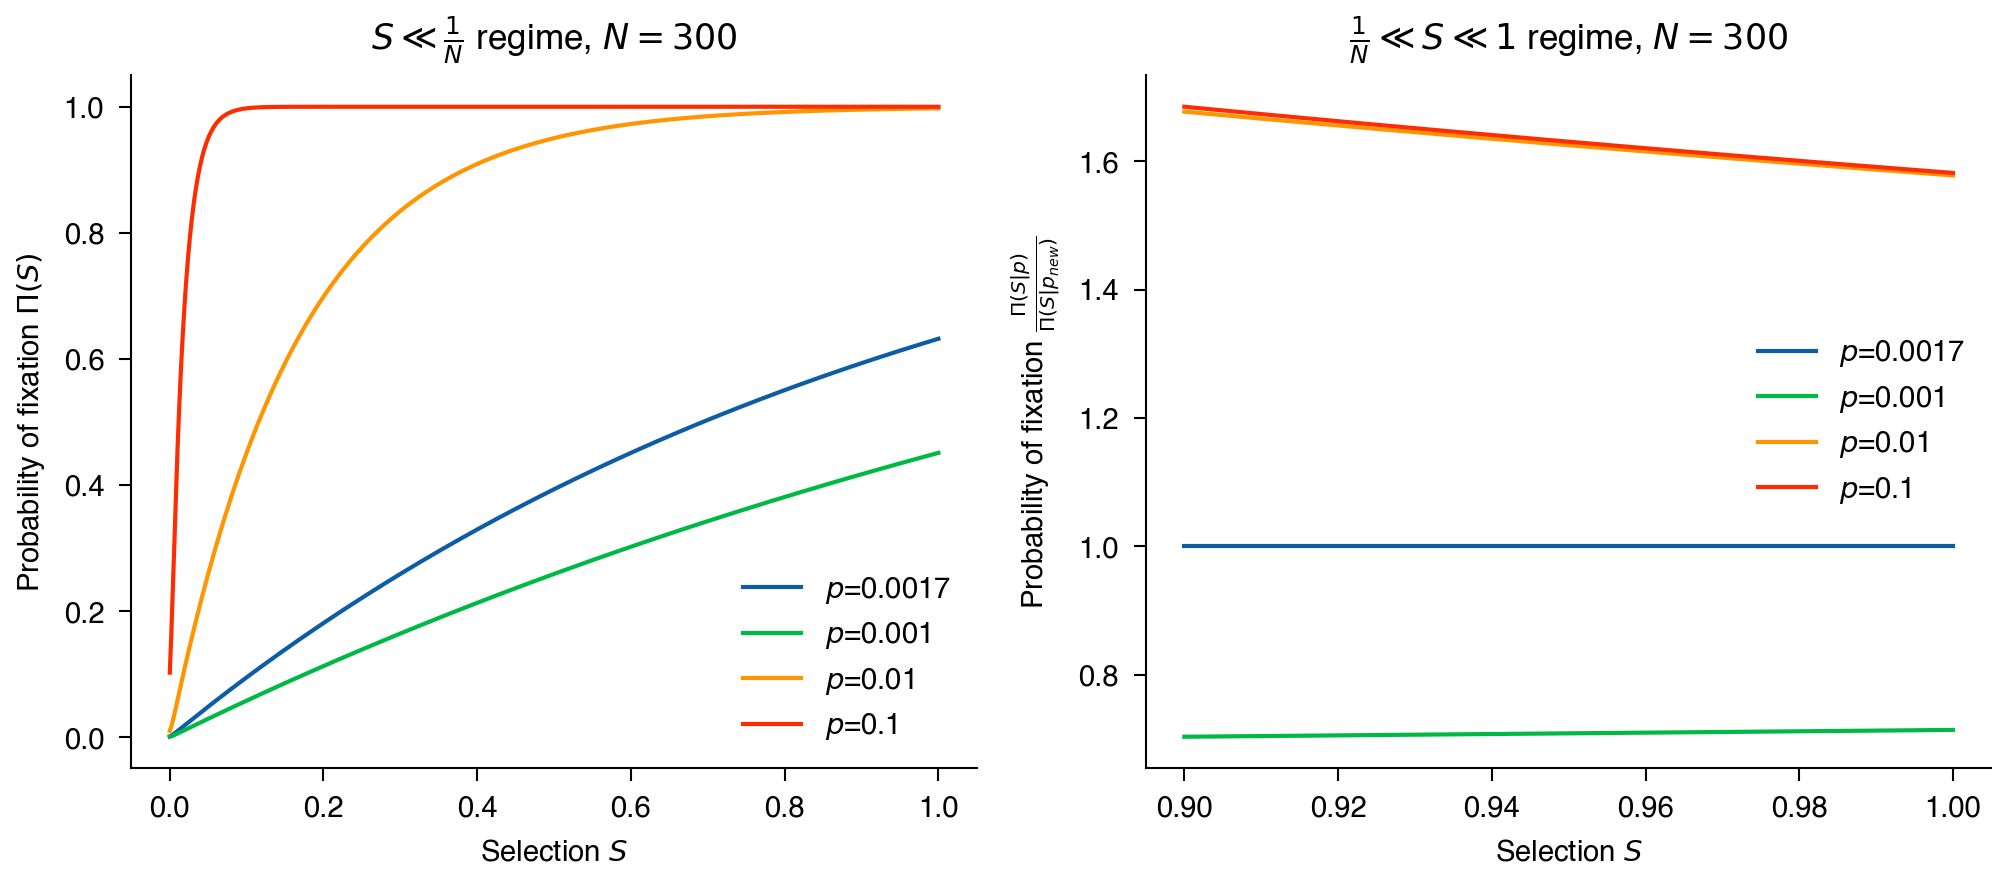

In [16]:
N = 300
ps = [1/2/N,0.001,0.01,0.1]

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

Ss = np.linspace(start=1e-4, stop=1, num=500)
ax[0].set_ylabel("Probability of fixation $\Pi(S)$")
ax[0].set_xlabel("Selection $S$")
ax[0].set_title(r"$S \ll \frac{1}{N}$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,
                 y=probability_of_fixation(N,Ss,p),
                 ax=ax[0],
                 label=f"$p$={p:.2g}")

Ss = np.linspace(start=0.9, stop=1, num=500)
ax[1].set_ylabel(r"Probability of fixation $\frac{\Pi(S|p)}{\Pi(S|p_{new})}$")
ax[1].set_xlabel("Selection $S$")
ax[1].set_title(r"$\frac{1}{N} \ll S \ll 1$ regime, $N=300$")
for p in ps:
    sns.lineplot(x=Ss,
                 y=probability_of_fixation(N,Ss,p)/probability_of_fixation(N,Ss,p_new),
                 ax=ax[1],
                 label=f"$p$={p:.2g}")

## Problem 1 c

$$\Pi(p)=C_1 e^{-2NSp}+C_2$$
$$\begin{aligned}
\Pi(f)&=1 &
\Pi(0)&=0 &
\end{aligned}$$

$$\Pi(0)=0=C_1+C_2\implies C_2=-C_1$$
$$\Pi(f)=1=C_1e^{-2NSf}+C_2\implies C_2=1-C_1e^{-2NSf}$$

$$1-C_1e^{-2NSf}=-C_1 \implies C_1=\frac{1}{e^{-2NSf}-1}$$

$$\Pi(p)=C_1e^{-2NSp}-C_1=\frac{e^{-2NSp}-1}{e^{-2NSf}-1}$$
$$\Pi(p)=\frac{1-e^{-2NSp}}{1-e^{-2NSf}}$$

$$p=-\frac{1}{2NS}\ln\left[1-\Pi(p)\left(1-e^{-2NSf}\right)\right]$$

In [18]:
def initial_freq_near_fixation(N,S,f,p_fixation):
    return -1/(2*N*S)*np.log(1-p_fixation*(1-np.exp(-2*N*S*f)))

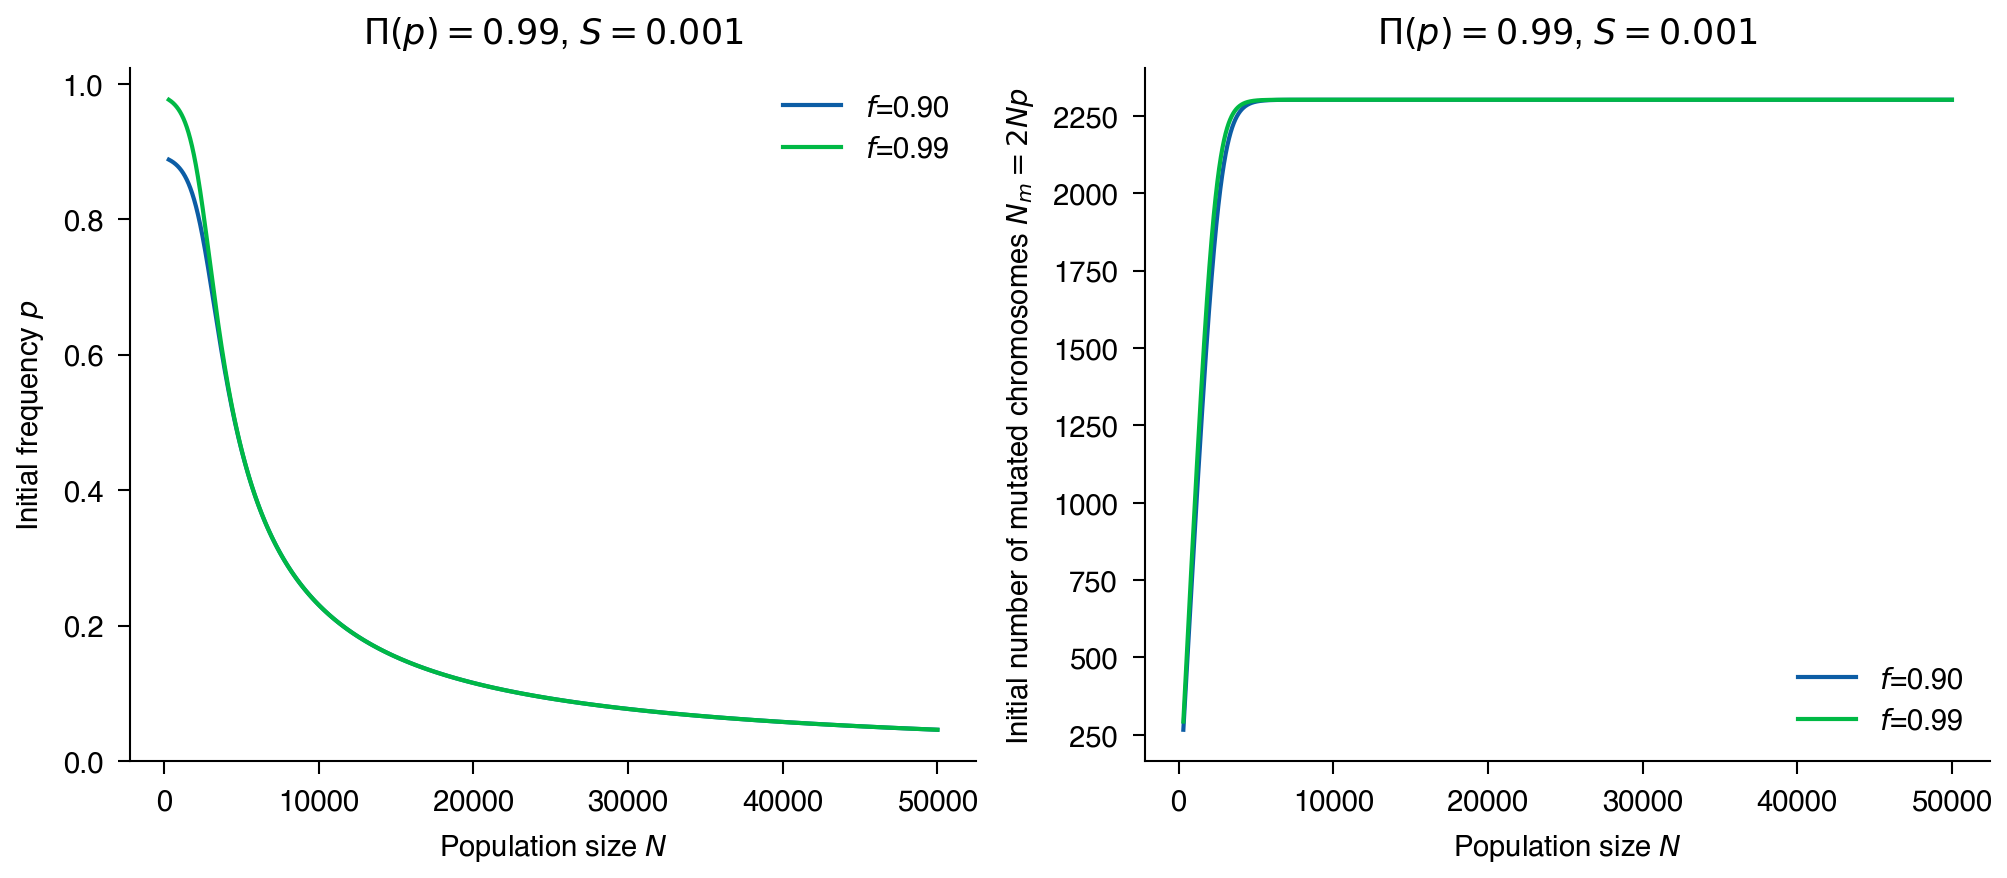

In [19]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,3)

N = np.arange(300,5e4)
S = 0.001
f = 0.90

for f in [0.90,0.99]:
    p_fixation = 0.99
    ax[0].set_ylabel(r"Initial frequency $p$")
    ax[0].set_xlabel("Population size $N$")
    ax[0].set_title(r"$\Pi(p)=0.99$, $S=0.001$")
    sns.lineplot(x=N,y=initial_freq_near_fixation(N,S,f,p_fixation),ax=ax[0],
                 label=f"$f$={f:.2f}")

    ax[1].set_ylabel(r"Initial number of mutated chromosomes $N_m=2Np$")
    ax[1].set_xlabel("Population size $N$")
    ax[1].set_title(r"$\Pi(p)=0.99$, $S=0.001$")
    sns.lineplot(x=N,y=N*initial_freq_near_fixation(N,S,f,p_fixation),ax=ax[1],
                 label=f"$f$={f:.2f}")


The actual number of mutated chromosomes $N_m=2Np$
$$N_m=Np=-\frac{1}{S}\ln[1-\Pi(p)\left(1-e^{-2NSf}\right)]$$

In the limit of large $N$, the exponent term $e^{-2NSf}\to 0$, and the actual number of mutated chromosomes will not depend on the population size.
$$\lim_{N\to\infty}N_m=-\frac{1}{S}\ln[1-\Pi(p)]$$

The initial frequency for near-fixation decreases with population size. For large populations, mutations that exceed a constant threshold $N_m$ are fixed with high (99\%) probability.

# Problem 2
## Problem 2 a

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("./pset_2_assets/times.csv",index_col=0)
df["Parent_Mid"] = (df["Parent_1"]+df["Parent_2"])/2

Maternal and paternal genotypes are independent. For this section of the question, we are interested in the effects of genotype only, ignore covariance of maternal-offspring environment and the covariance of offspring genotype-environment. Assume no dominance, such that the covariance in the allele $\text{Cov}(M,M^\prime)$ is zero.

$$\text{Cov}(M,O)=\cancel{\text{Cov}(X_P,X_M)}+\text{Cov}(X_M,X_M)+\cancel{\text{Cov}(X_P,X_{M^\prime})}+\text{Cov}(X_M,X_{M^\prime})+\underbrace{\text{Cov}(X_O,E_O)}_{\text{Ignore}}+\underbrace{\text{Cov}(E_M,E_O)}_{\text{Ignore}}$$

$$\text{Cov}(M,O)=\text{Cov}(X_M,X_M)=\text{Var}(X_M)=\frac{V_A}{2}$$

$$\text{Var}({M})=\text{Var}({P})=\text{Var}({O})=V_\text{Phenotype}$$

$$\text{CorrCoef}(M,O)=\frac{\text{Cov}(M,O)}{\sqrt{\text{Var}(M)\text{Var}(O)}}=\frac{V_A/2}{V_{\mathrm{Phenotype}}}=\frac{h^2}{2}$$

$$X_\text{Mid}=\frac{X_P+X_M}{2}$$
$$\text{Var}(\text{Mid})=\frac{2\text{Var}(X)}{4}=\frac{V_\text{Phenotype}}{2}$$

$$\text{CorrCoef}(M,\text{Mid})=\frac{\text{Cov}(M,O)}{\sqrt{\text{Var}(\text{Mid})\text{Var}(O)}}=\frac{V_A/2}{V_{\mathrm{Phenotype}}/\sqrt{2}}=\frac{h^2}{\sqrt{2}}$$

In [52]:
def reg(x, y, factor,ax=None,plot=True,**kwargs):
    """https://stackoverflow.com/questions/67268096
    how-to-display-pearsonr-squared-and-regression-equation-on-a-pairplot
    """
    if plot:
        ax = ax or plt.gca()
        slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
        ax.annotate((f'$r ={r_value:.2f}$\n$\hat y={slope:.2f}x{intercept:+.2f}$'
                    f'\n$h^2={factor*r_value:.2f}$'),
                    xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                    color='black', ha='left', va='top')
    else:
        slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
        return factor*r_value

In [45]:
def heritabilityPlot(df,plot=True):
    list_of_dfs_fullparent = []
    for i in product(["Parent_1", "Parent_2"], ["Full_sibling_1", "Full_sibling_2"]):
        sub_df = df[list(i)]
        sub_df.columns = ["Parent", "Sibling"]
        list_of_dfs_fullparent.append(sub_df)
    comb_df_fullparent = pd.concat(list_of_dfs_fullparent)

    list_of_dfs_midparent = []
    for i in product(["Parent_Mid"], ["Full_sibling_1", "Full_sibling_2"]):
        sub_df = df[list(i)]
        sub_df.columns = ["Mid-Parent", "Sibling"]
        list_of_dfs_midparent.append(sub_df)
    comb_df_midparent = pd.concat(list_of_dfs_midparent)


    fig,ax = plt.subplots(1,2)
    fig.set_size_inches((8,4))
    sns.regplot(comb_df_fullparent,
                    x = "Parent",
                    y = "Sibling",
                    line_kws = {'color':'red'},
                    scatter_kws = {'alpha': 0.2},
                    ax=ax[0])
    reg(comb_df_fullparent["Sibling"], comb_df_fullparent["Parent"], 2, ax[0])

    sns.regplot(comb_df_midparent,
                    x = "Mid-Parent",
                    y = "Sibling",
                    line_kws = {'color':'red'},
                    scatter_kws = {'alpha': 0.2},
                    ax=ax[1])
    reg(comb_df_midparent["Sibling"], comb_df_midparent["Mid-Parent"], np.sqrt(2), ax[1])
    return fig, ax


In [96]:
def heritability(df,plot=True):
    list_of_dfs_fullparent = []
    for i in product(["Parent_1", "Parent_2"], ["Full_sibling_1", "Full_sibling_2"]):
        sub_df = df[list(i)]
        sub_df.columns = ["Parent", "Sibling"]
        list_of_dfs_fullparent.append(sub_df)
    comb_df_fullparent = pd.concat(list_of_dfs_fullparent)

    list_of_dfs_midparent = []
    for i in product(["Parent_Mid"], ["Full_sibling_1", "Full_sibling_2"]):
        sub_df = df[list(i)]
        sub_df.columns = ["Mid-Parent", "Sibling"]
        list_of_dfs_midparent.append(sub_df)
    comb_df_midparent = pd.concat(list_of_dfs_midparent)


    r1 = reg(comb_df_fullparent["Sibling"], comb_df_fullparent["Parent"],
        2, None, False)

    r2 = reg(comb_df_midparent["Sibling"], comb_df_midparent["Mid-Parent"],
        np.sqrt(2), None, False)
    return (r1, r2)

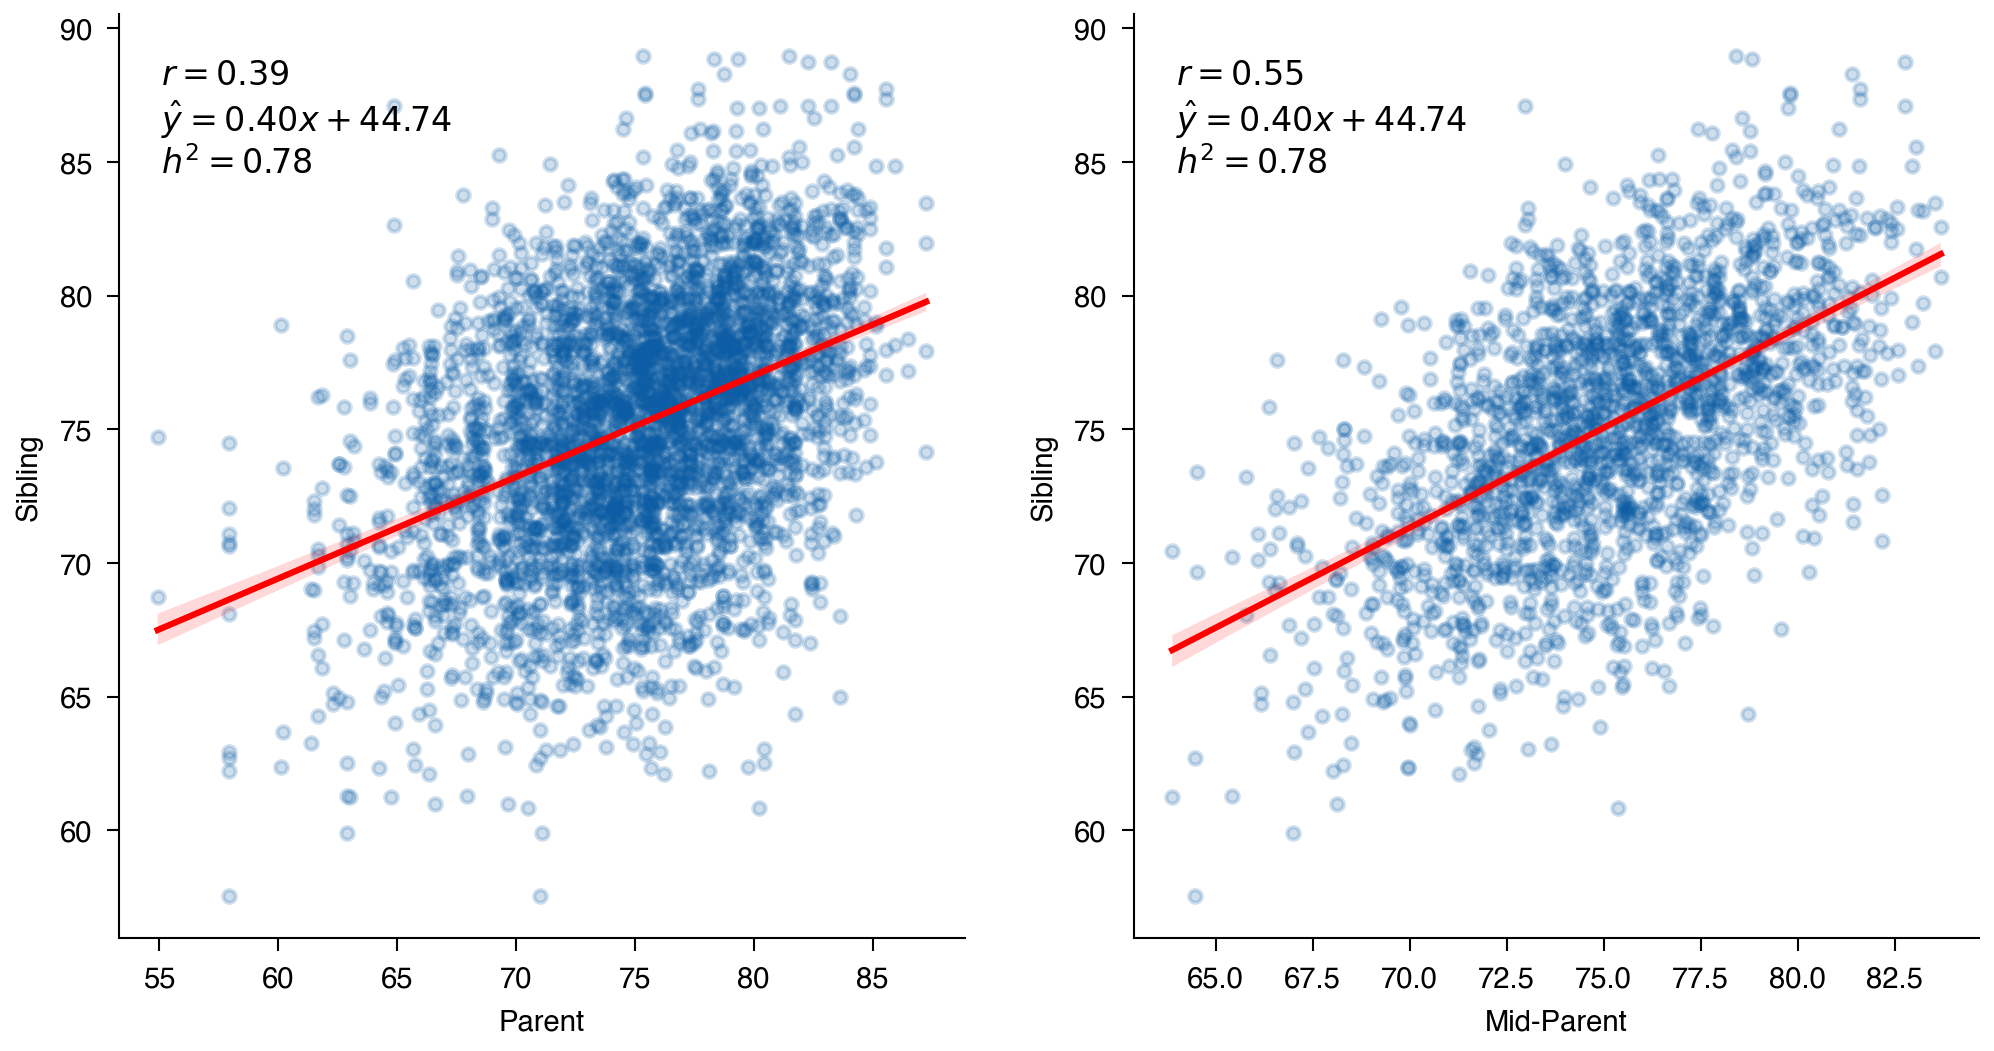

In [29]:
heritabilityPlot(df);

The narrow-sense heritability between parents and offspring and mid-parents and offspring are the same, which is mathematically consistent.

## Problem 2 b

If the parent and offspring experiencing the same environmental noise, the heritability increases since the environmental noise is equal and correlated.

If the parent and offspring experience different and independent environmental noise, which can be either identically or non-identically distributed, the heritability decreases since the noise is independent and hence uncorrelated.

In [70]:
def noise(df,std_P1=0,std_P2=0,std_O1=0,std_O2=0):
    df = df.copy()
    mu = 0
    df["Parent_1"] += np.random.normal(mu,std_P1,df.shape[0])
    df["Parent_2"] += np.random.normal(mu,std_P2,df.shape[0])
    df["Full_sibling_1"] += np.random.normal(mu,std_O1,df.shape[0])
    df["Full_sibling_2"] += np.random.normal(mu,std_O2,df.shape[0])
    df["Parent_Mid"] = (df["Parent_1"]+df["Parent_2"])/2
    return df

In [134]:
def correlatedNoise(df,std=0):
    df = df.copy()
    mu = 0
    noise = np.random.normal(mu,std,df.shape[0])
    df["Parent_1"] += noise
    df["Parent_2"] += noise
    df["Full_sibling_1"] += noise
    df["Full_sibling_2"] += noise
    df["Parent_Mid"] = (df["Parent_1"]+df["Parent_2"])/2
    return df

### Simulating $E_{M/P} = E_{O_1/O_2}$

Consider independent and identically distributed noise of the parent and offspring. Here, the heritability decreases to $h^2=0.17$.

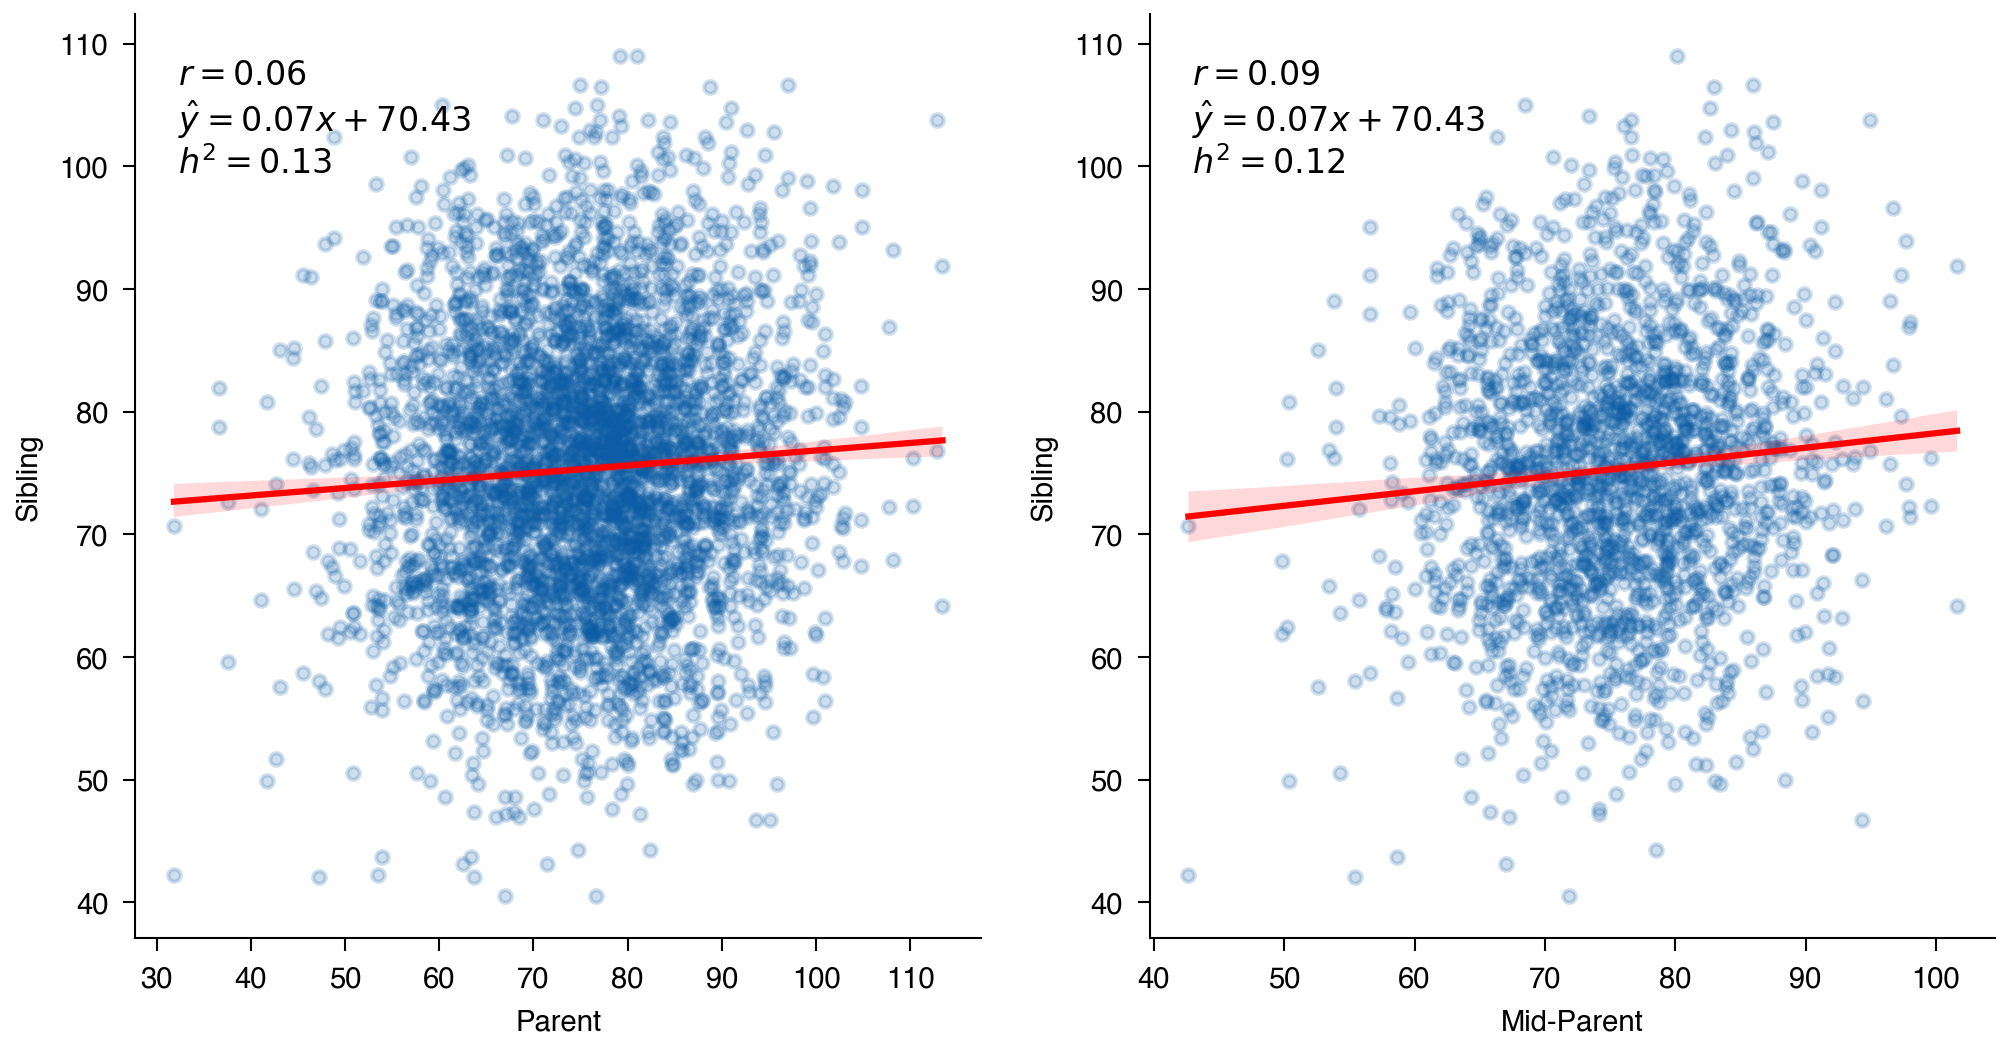

In [42]:
heritabilityPlot(noise(df,
                       std_P1=10,
                       std_P2=10,
                       std_O1=10,
                       std_O2=10));

When noise is independent, heritability decreases as the magnitude (variance) of the noise increases. The following shows heritability as a function of the magnitude of noise, over 100 random noise samples from the normal distribution.

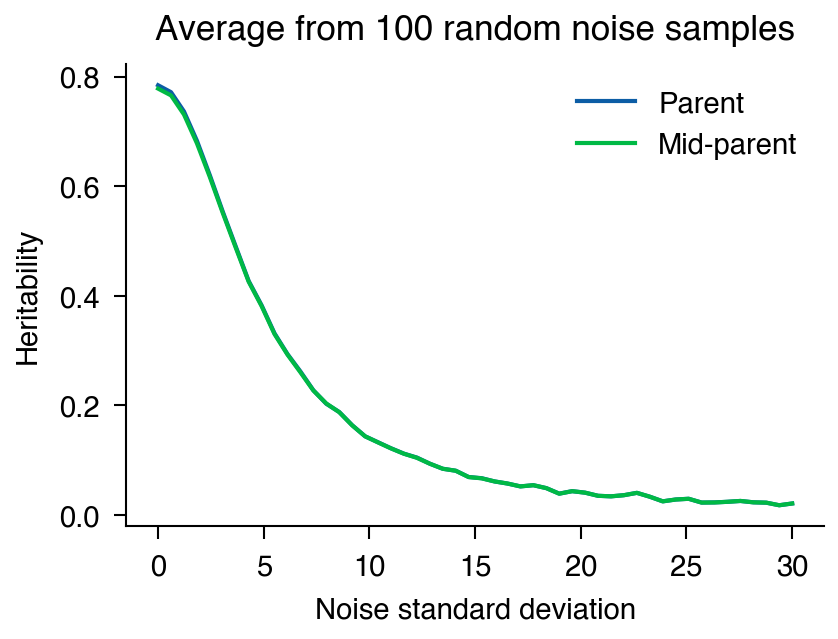

In [104]:
lst = []
noise_std = np.linspace(0,30)
fig, ax = plt.subplots()
for n in noise_std:
    r_lst = []
    for i in range(100):
        r = heritability(noise(df,
                            std_P1=n,
                            std_P2=n,
                            std_O1=n,
                            std_O2=n))
        r_lst.append(r)
    lst.append(np.array(r_lst).mean(axis=0))
sns.lineplot(x=noise_std, y=np.array(lst)[:,0],label="Parent")
sns.lineplot(x=noise_std, y=np.array(lst)[:,1],label="Mid-parent")
ax.set_xlabel("Noise standard deviation")
ax.set_ylabel("Heritability")
ax.set_title("Average from 100 random noise samples");

In fact, in the limit of high variance, the plot becomes a 2D Gaussian, which is gives a Pearson correlation coefficient $r\approx0$.

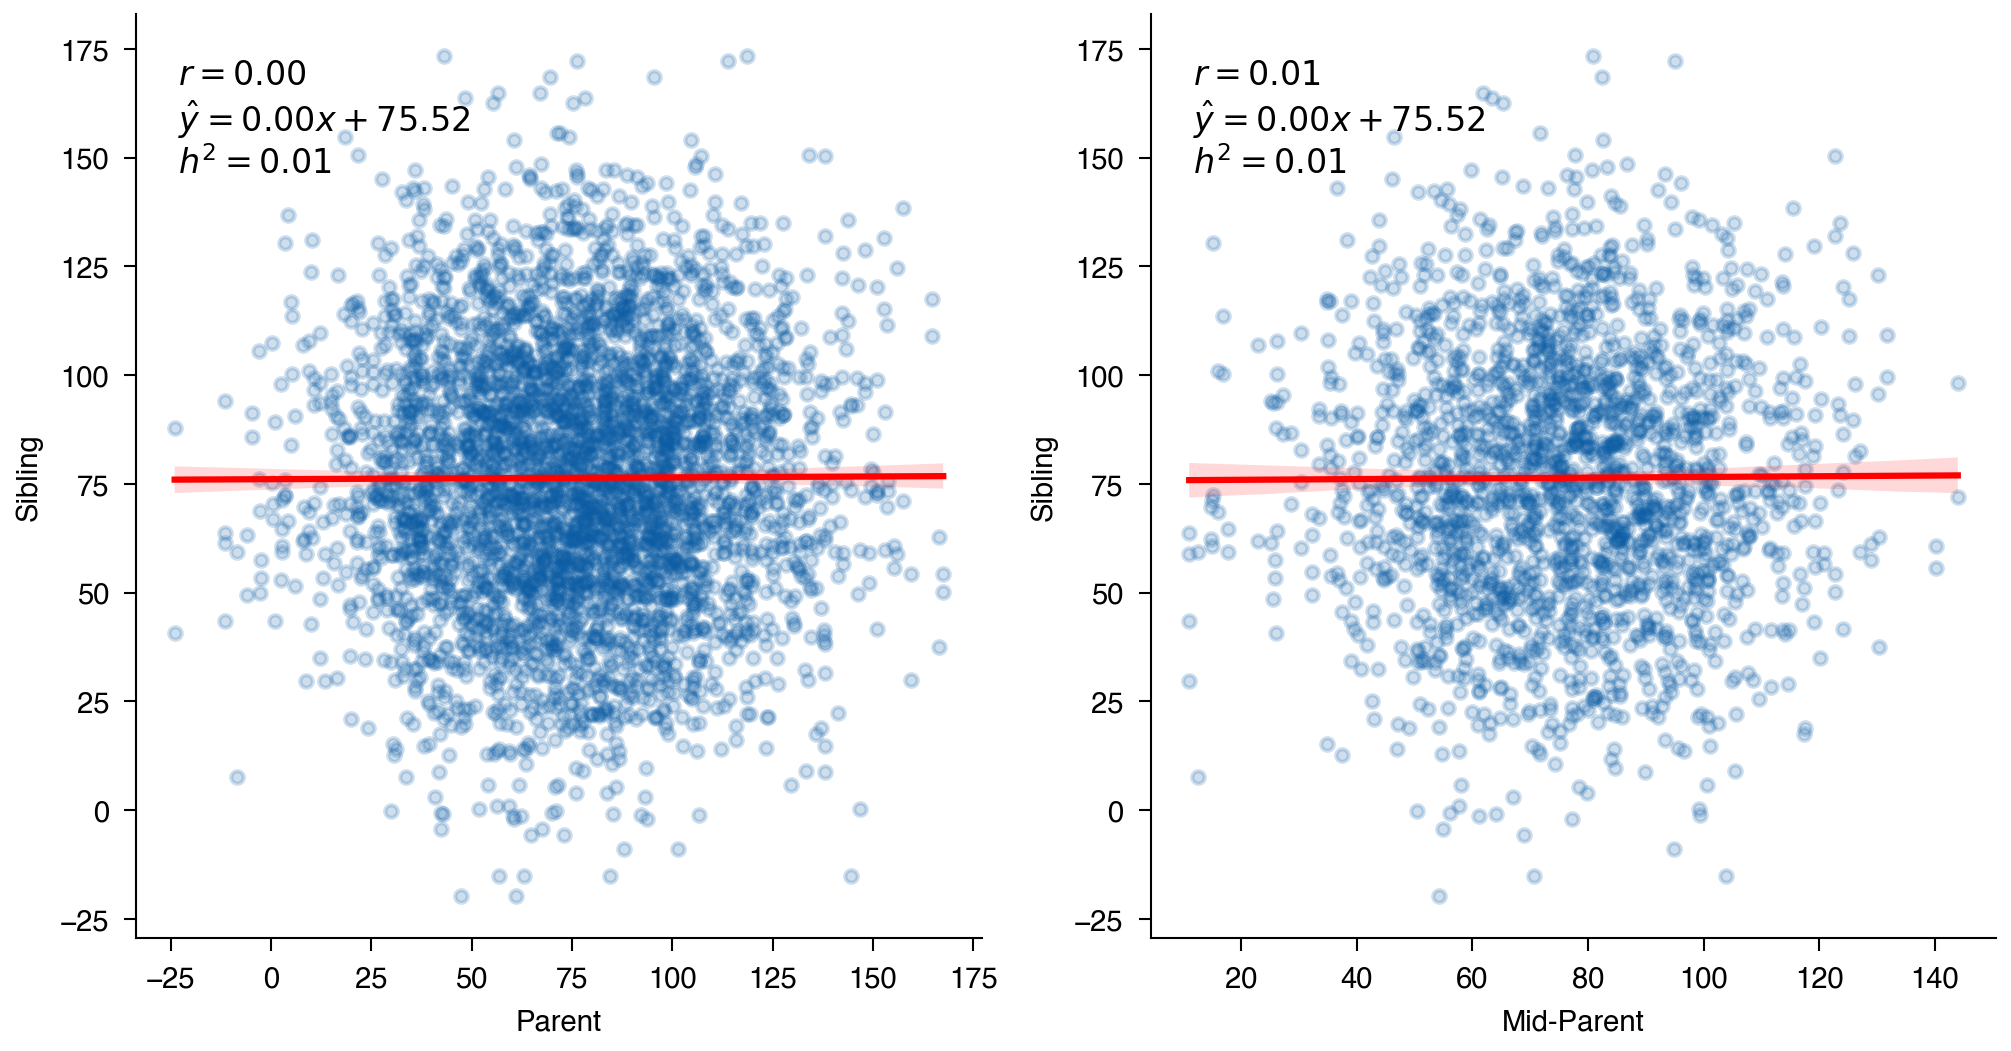

In [102]:
heritabilityPlot(noise(df,
                       std_P1=30,
                       std_P2=30,
                       std_O1=30,
                       std_O2=30));

Using the same noise, heritability actually increases because the noise is correlated. The heritability becomes greater than 1, which it shouldn't without confounding the effect of environments.

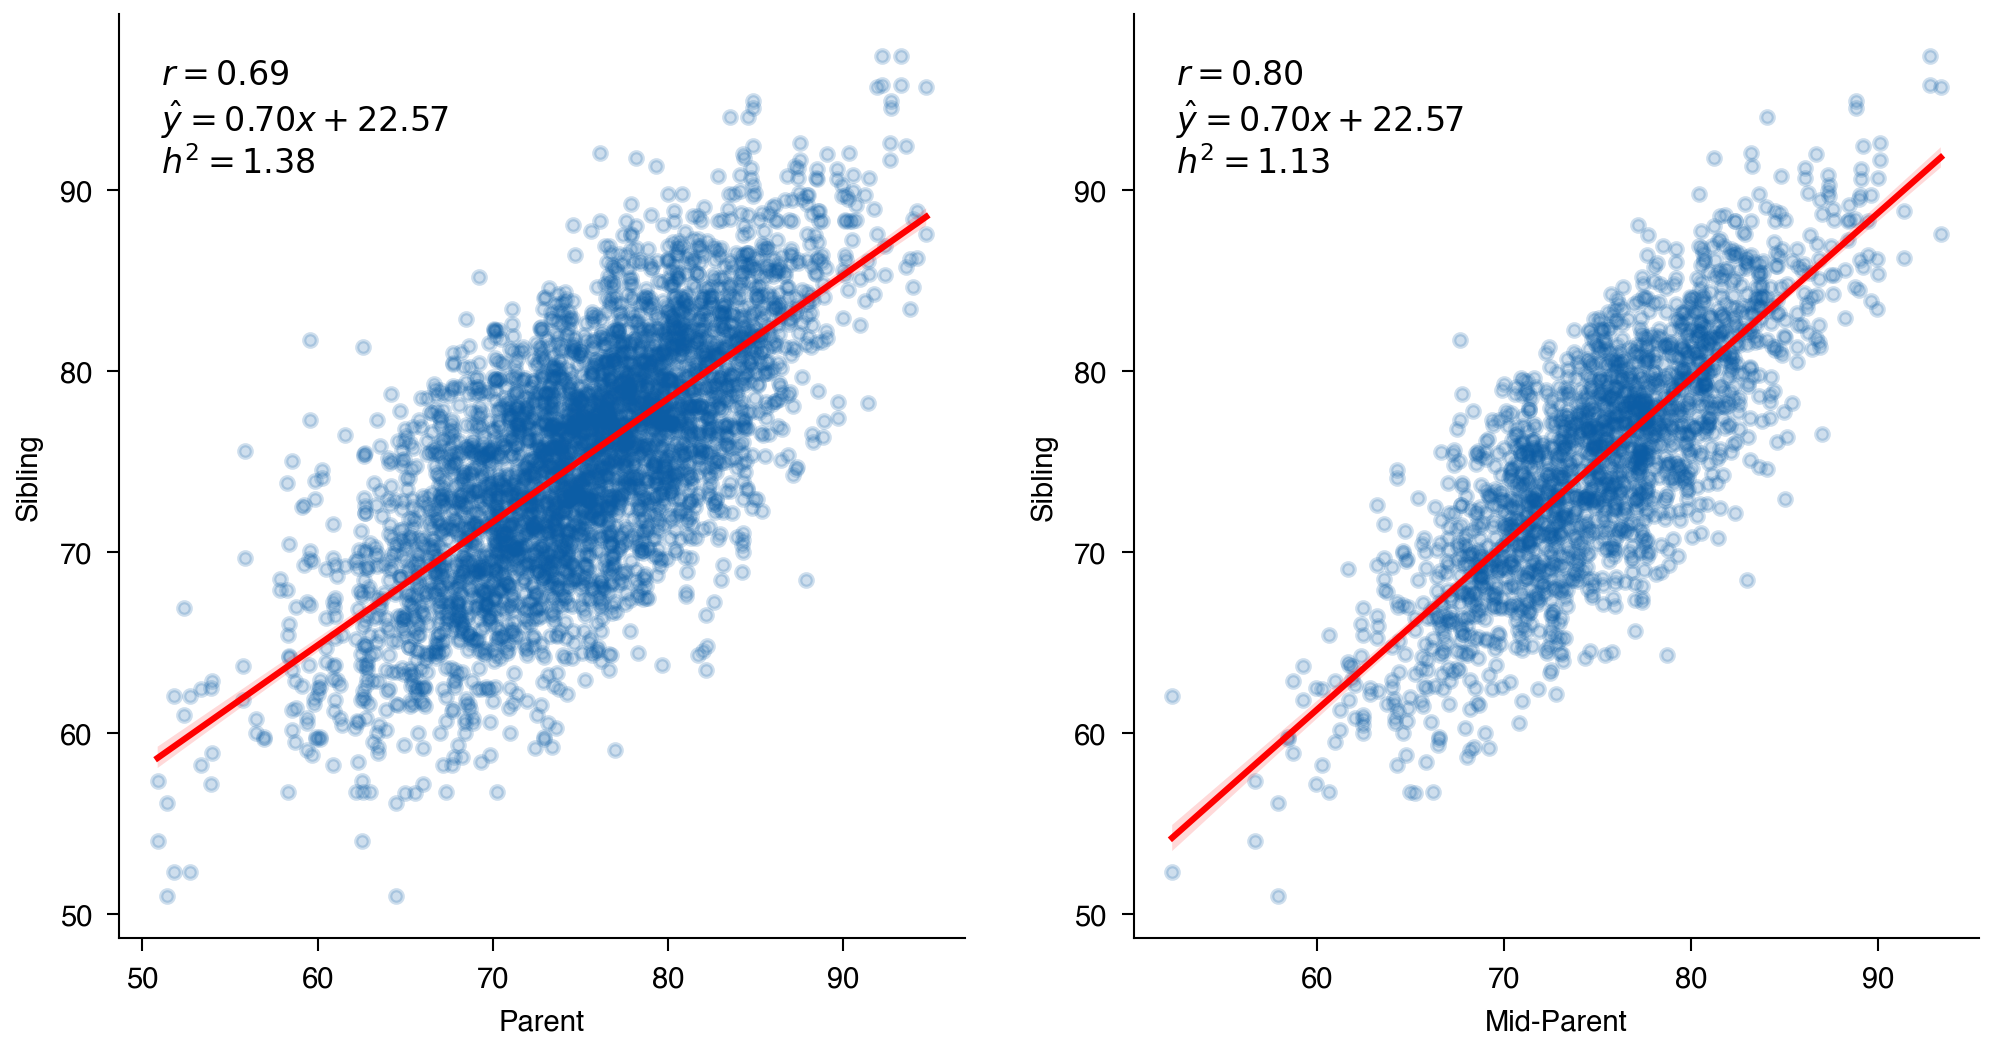

In [142]:
heritabilityPlot(correlatedNoise(df,
                       std=5));

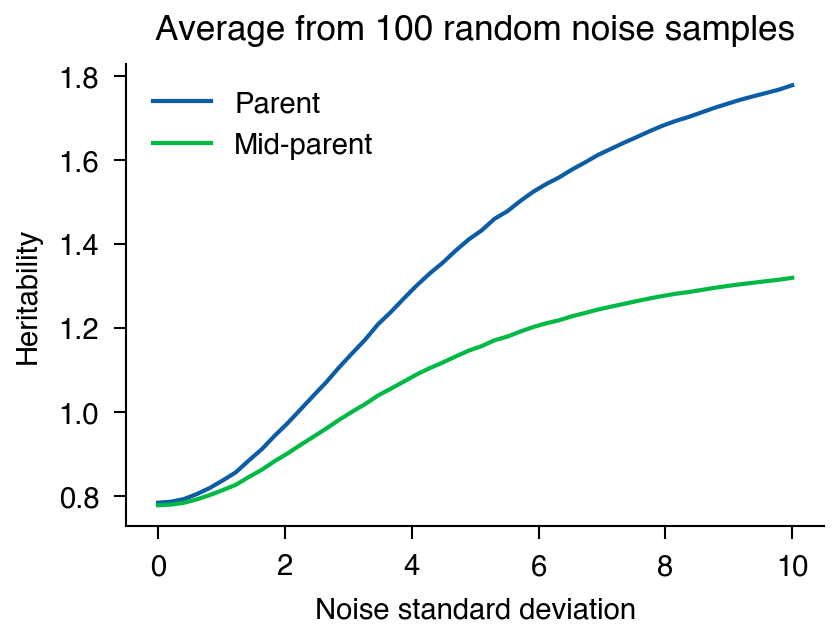

In [145]:
lst = []
noise_std = np.linspace(0,10)
fig, ax = plt.subplots()
for n in noise_std:
    r_lst = []
    for i in range(100):
        r = heritability(correlatedNoise(df,
                       std=n))
        r_lst.append(r)
    lst.append(np.array(r_lst).mean(axis=0))
sns.lineplot(x=noise_std, y=np.array(lst)[:,0],label="Parent")
sns.lineplot(x=noise_std, y=np.array(lst)[:,1],label="Mid-parent")
ax.set_xlabel("Noise standard deviation")
ax.set_ylabel("Heritability")
ax.set_title("Average from 100 random noise samples");

## Simulating $E_{M/P} \neq E_{O_1/O_2}$

Different magnitudes of environmental noise in parents and children decreases heritability.

For $E_{M/P} > E_{O_1/O_2}$

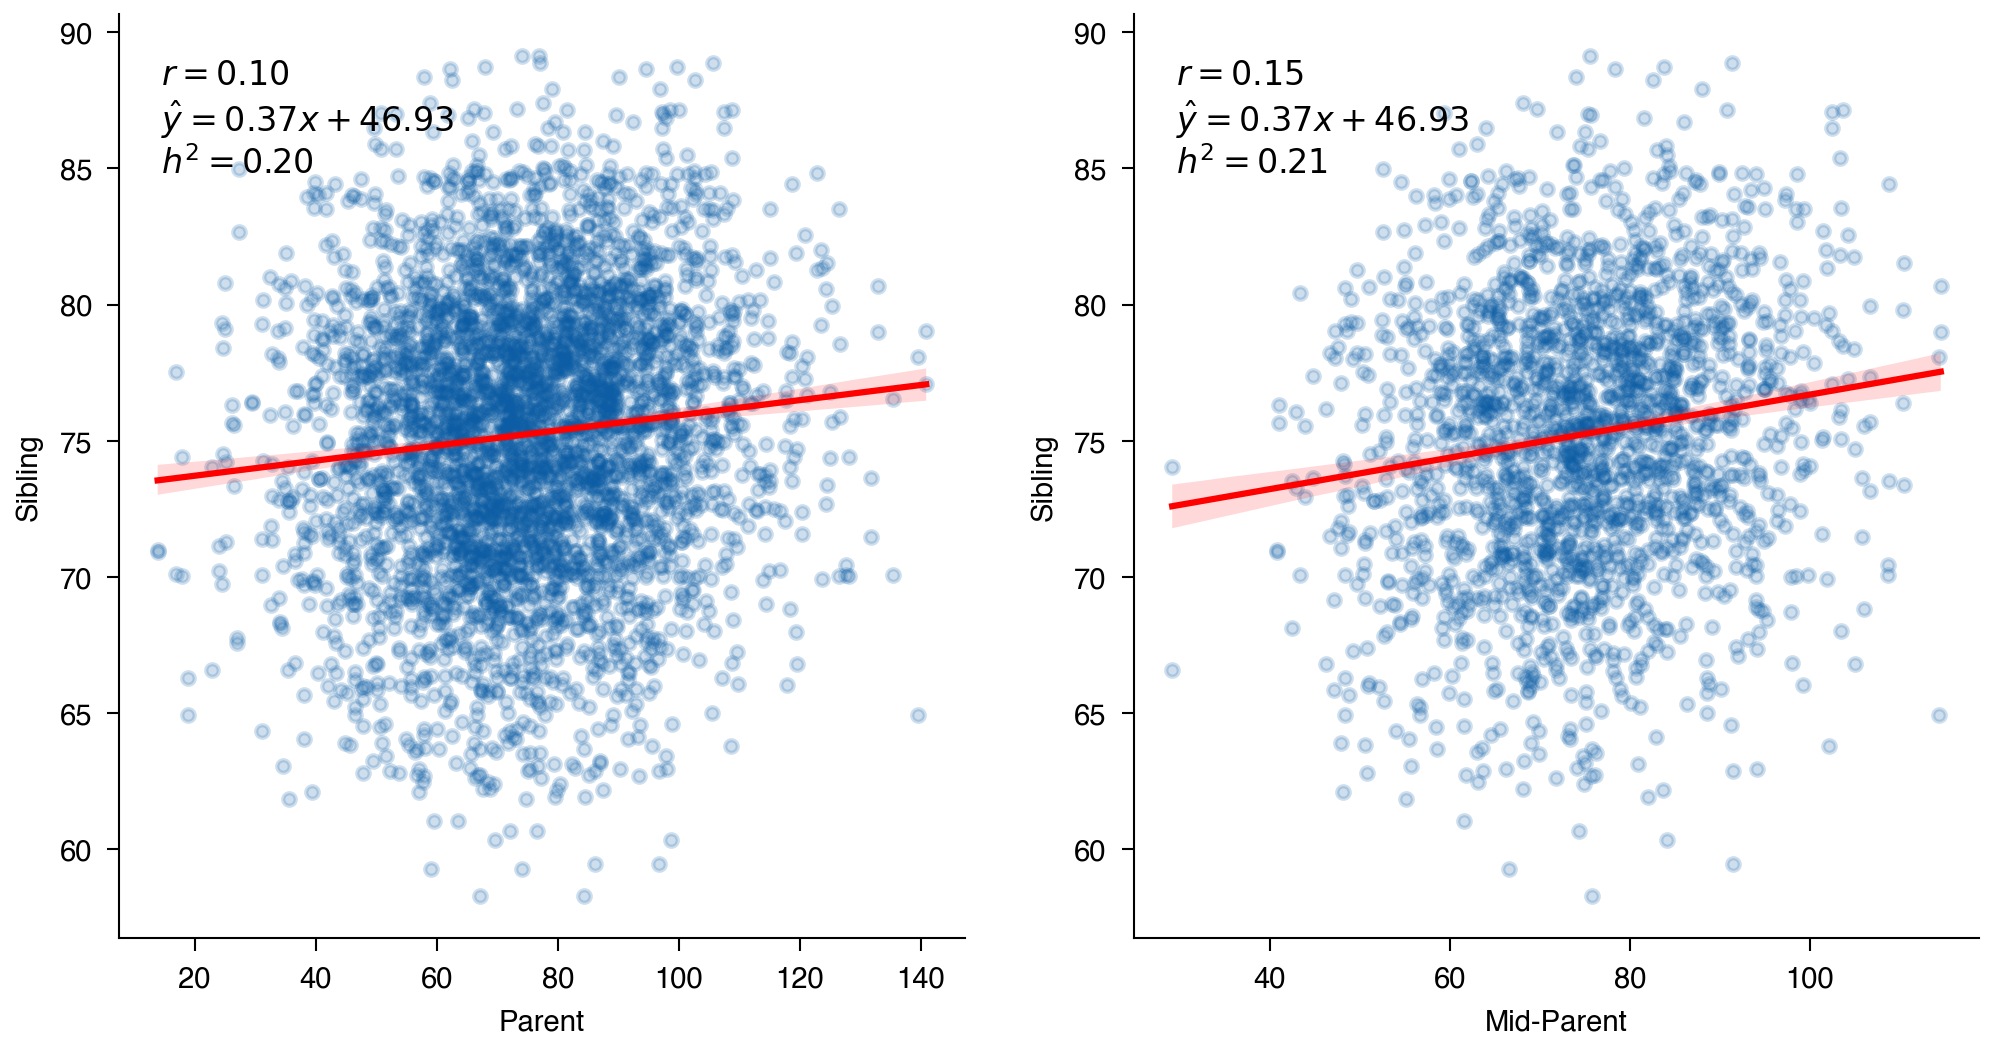

In [122]:
heritabilityPlot(noise(df,
                       std_P1=18,
                       std_P2=18,
                       std_O1=2,
                       std_O2=2));

For For $E_{M/P} < E_{O_1/O_2}$

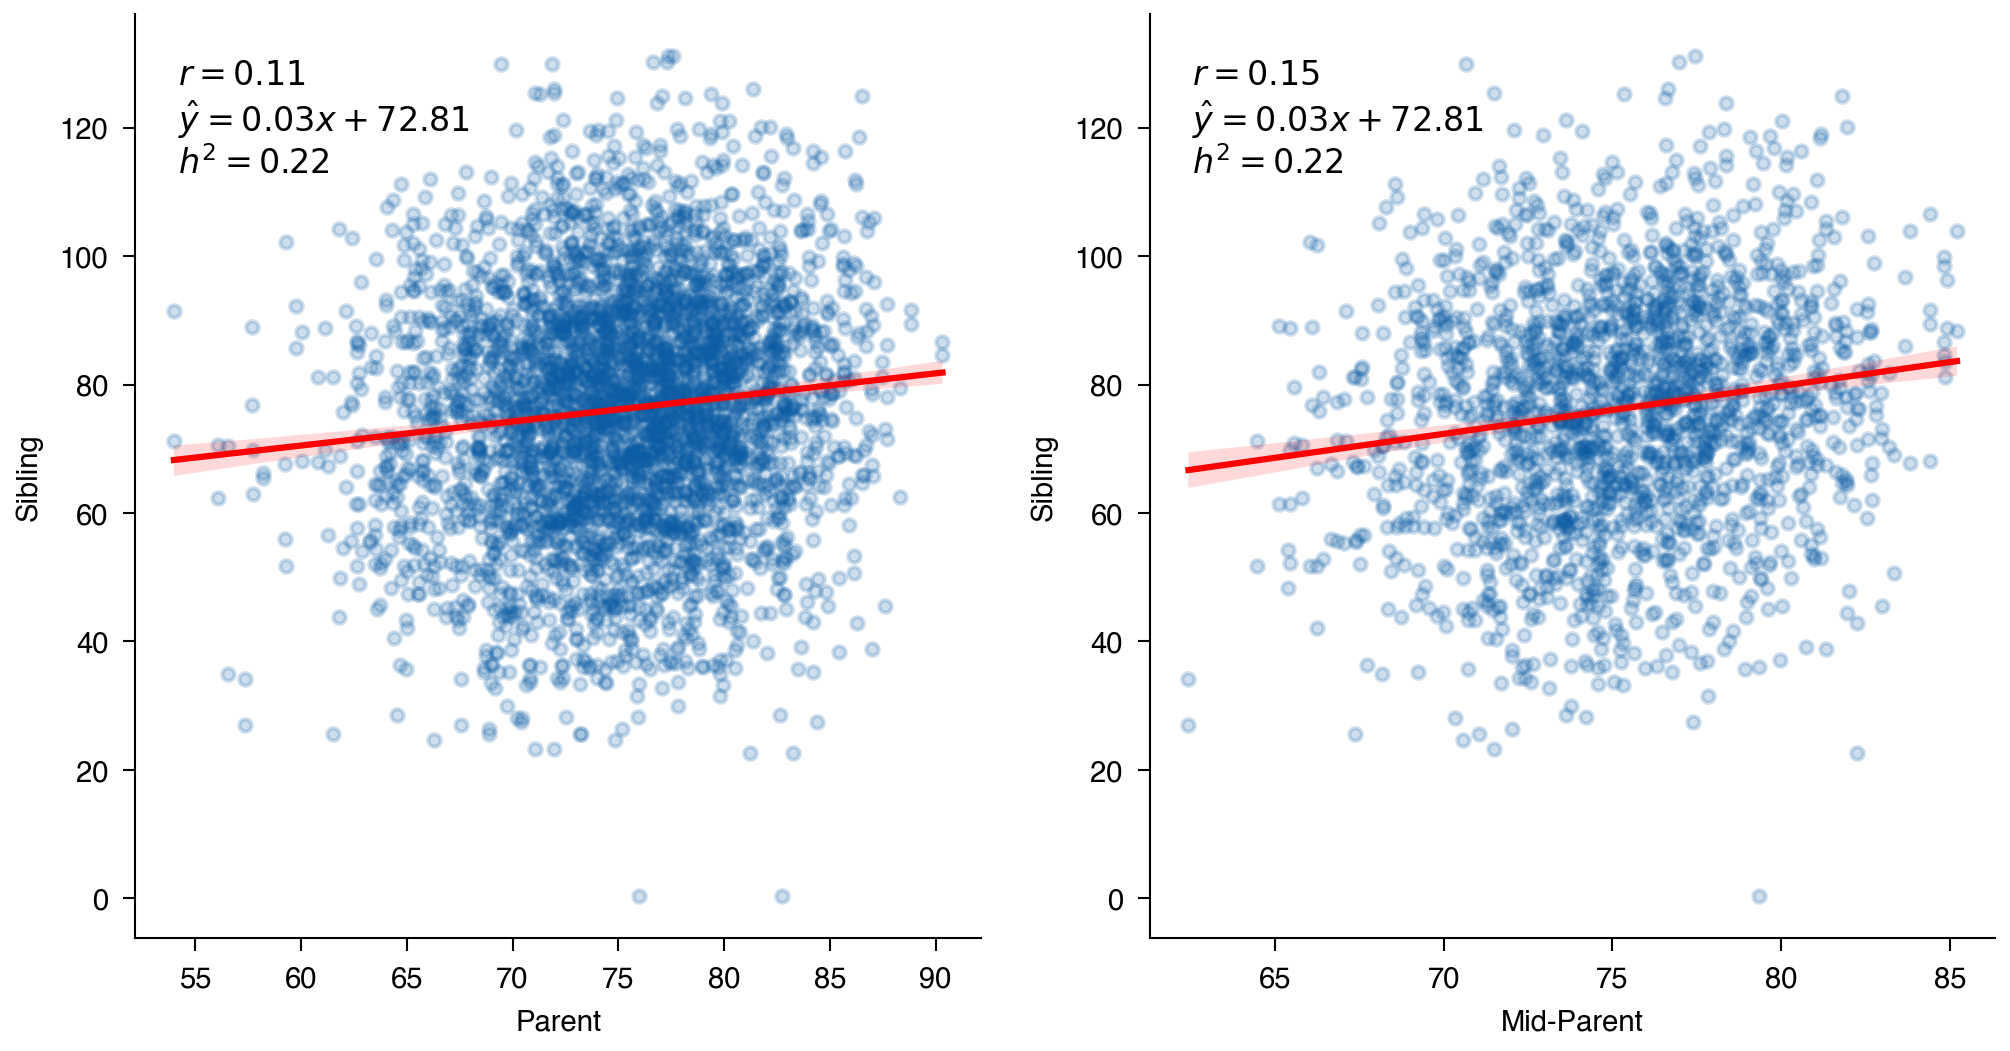

In [125]:
heritabilityPlot(noise(df,
                       std_P1=2,
                       std_P2=2,
                       std_O1=18,
                       std_O2=18));

In fact, we can plot a curve for $E_{M/P} + E_{O_1/O_2} = \text{constant}$, and varying the partition of variance from parent and offspring. Averaging over 50 random normal samples for the environmental noise, it empirically looks like the decrease in heritability is most significant when variance is equally split between parent and offspring.

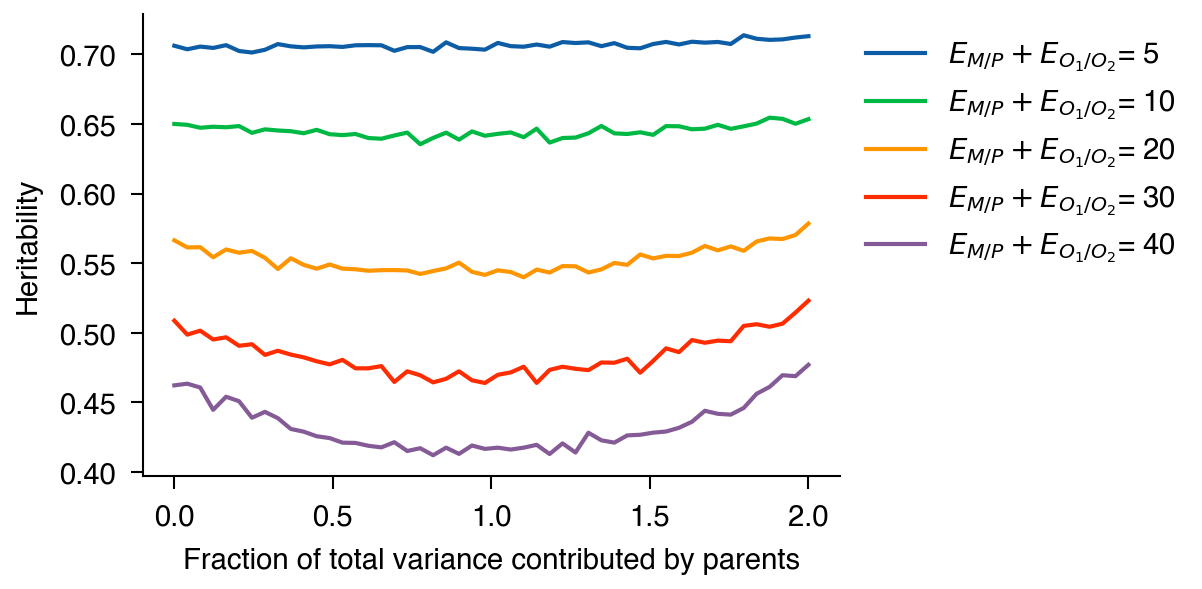

In [130]:
fig, ax = plt.subplots()
for constant in [5,10,20,30,40]:
    lst = []
    noise_std = np.linspace(0,constant)
    for n in noise_std:
        r_lst = []
        for i in range(50):
            r = heritability(noise(df,
                                std_P1=np.sqrt(n),
                                std_P2=np.sqrt(n),
                                std_O1=np.sqrt(constant-n),
                                std_O2=np.sqrt(constant-n)))
            r_lst.append(r)
        lst.append(np.array(r_lst).mean(axis=0))
    g = sns.lineplot(x=noise_std/noise_std.mean(), y=np.array(lst)[:,0],
                     label="$E_{M/P} + E_{O_1/O_2}$" + f"= {constant}")
    ax.set_xlabel("Fraction of total variance contributed by parents")
    ax.set_ylabel("Heritability")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Simulating $E_{O_1} > E_{O_2}$

Because we are aggregating the siblings in the regression and scatter plot, there is not a significant effect of varying the magnitude of environmental noise in the two siblings.

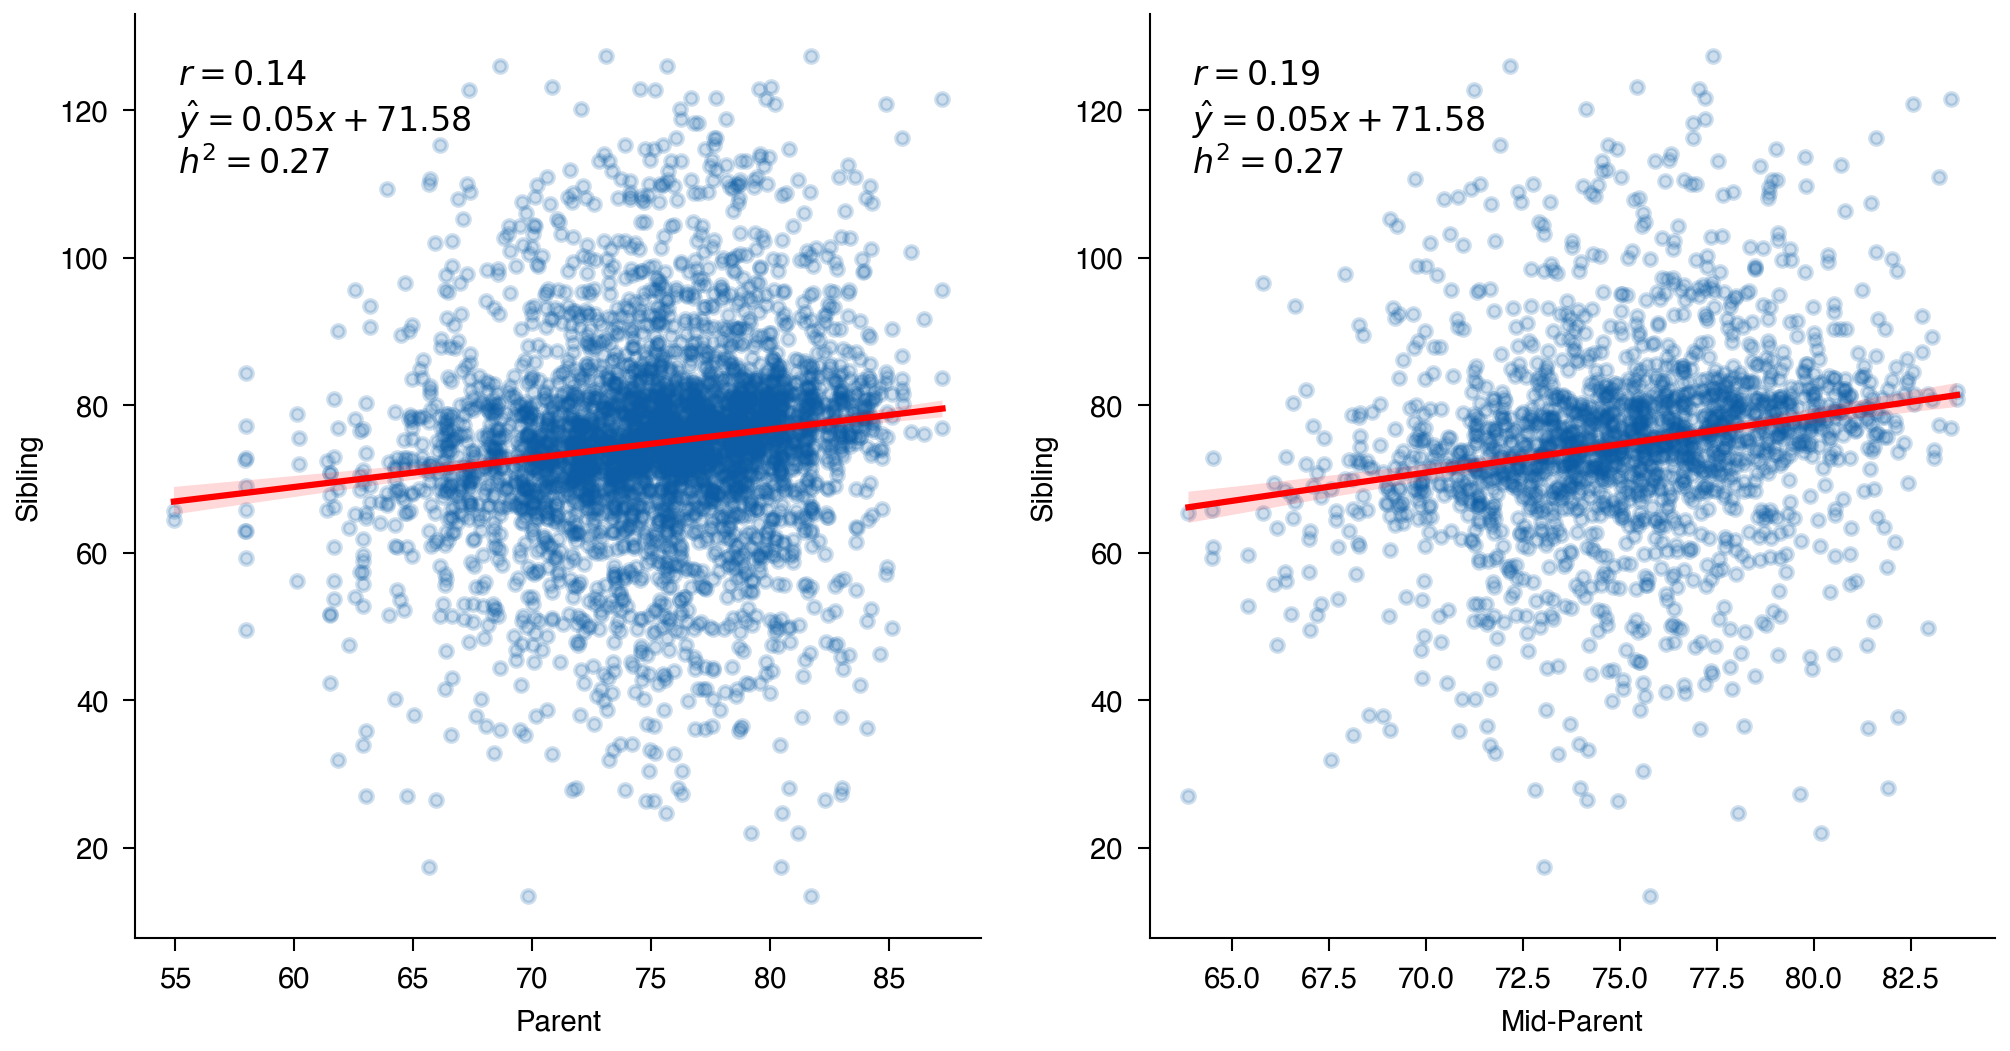

In [35]:
heritabilityPlot(noise(df,
                       std_P1=0,
                       std_P2=0,
                       std_O1=18,
                       std_O2=2));

### Simulating $E_{O_1} < E_{O_2}$

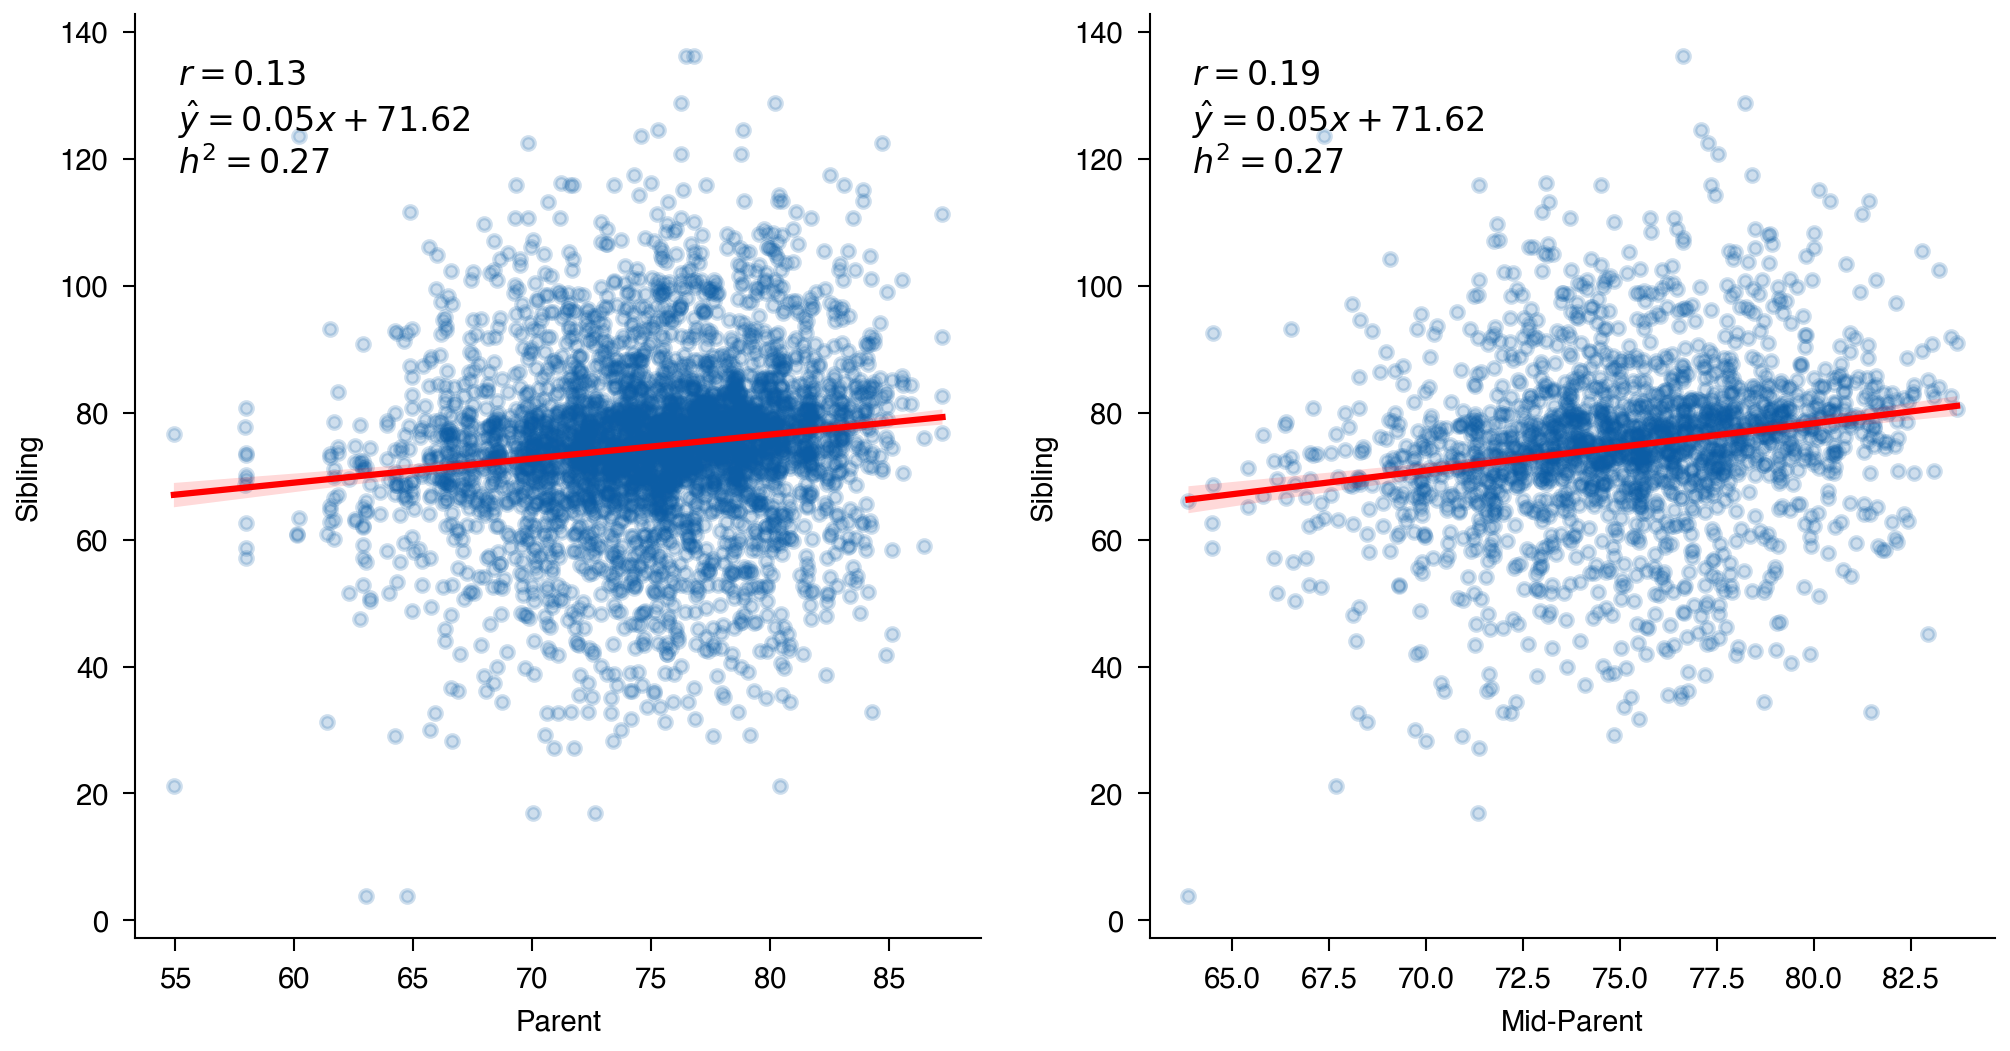

In [36]:
heritabilityPlot(noise(df,
                       std_P1=0,
                       std_P2=0,
                       std_O1=2,
                       std_O2=18));

Keeping total environmental variance constant, we can see that the partition of variance between siblings has no effect on heritability.

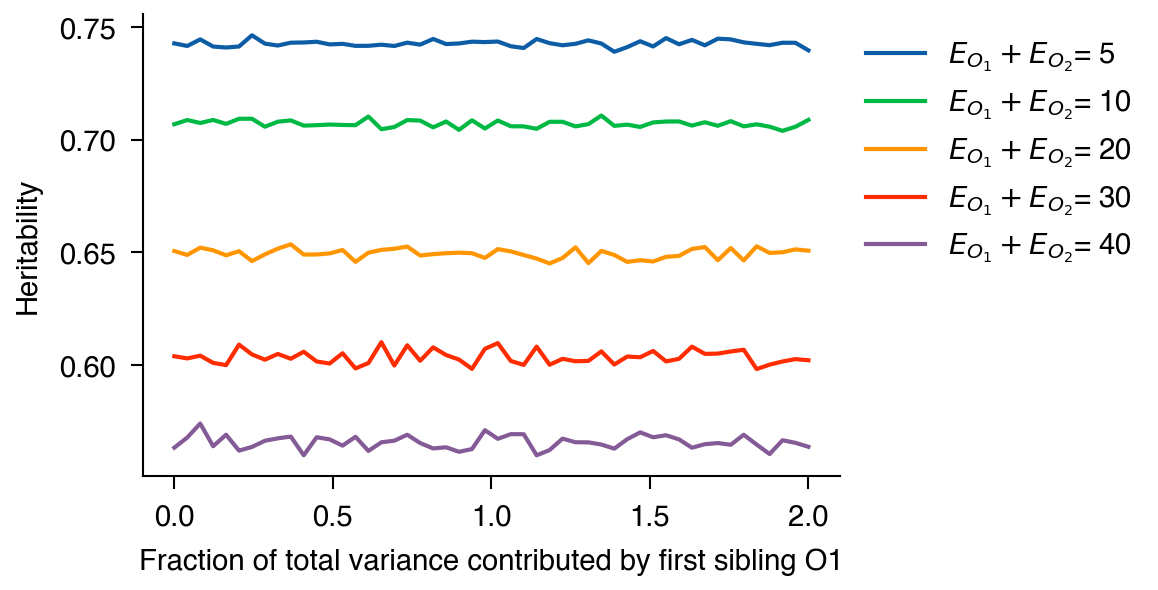

In [129]:
fig, ax = plt.subplots()
for constant in [5,10,20,30,40]:
    lst = []
    noise_std = np.linspace(0,constant)
    for n in noise_std:
        r_lst = []
        for i in range(50):
            r = heritability(noise(df,
                                std_P1=0,
                                std_P2=0,
                                std_O1=np.sqrt(n),
                                std_O2=np.sqrt(constant-n)))
            r_lst.append(r)
        lst.append(np.array(r_lst).mean(axis=0))
    g = sns.lineplot(x=noise_std/noise_std.mean(), y=np.array(lst)[:,0],
                     label="$E_{O_1} + E_{O_2}$" + f"= {constant}")
    ax.set_xlabel("Fraction of total variance contributed by first sibling O1")
    ax.set_ylabel("Heritability")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))